# 01 - Data Exploration (BTC-USD)

This notebook performs a quick Exploratory Data Analysis (EDA) on **BTC-USD** price data downloaded from Yahoo Finance via `yfinance`.

**Goal:** understand price dynamics, returns distribution, and volatility regimes.

> Educational portfolio project. Not financial advice.

## 0) Setup

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

print("Imports OK")


Imports OK


## 1) Download BTC-USD

In [2]:
TICKER = "BTC-USD"
START = "2012-01-01"
END = None  # None -> up to latest available

df = yf.download(TICKER, start=START, end=END, progress=False)
df = df.dropna().copy()
df.head()


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


## 2) Close Price

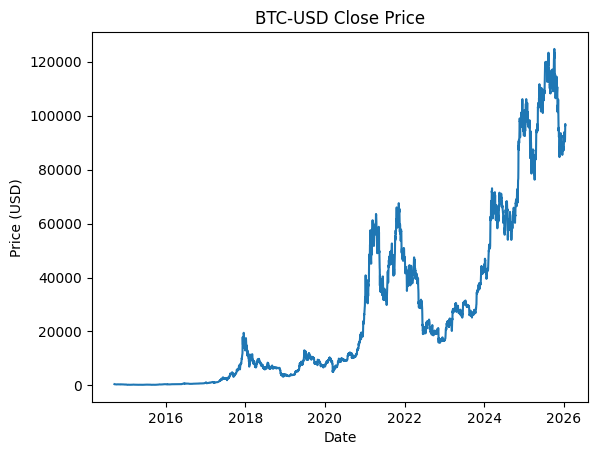

In [3]:
plt.figure()
plt.plot(df.index, df["Close"])
plt.title("BTC-USD Close Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


## 3) Returns (log)

In [4]:
df_eda = df.copy()
df_eda["log_return"] = np.log(df_eda["Close"]).diff()
df_eda = df_eda.dropna()

df_eda[["Close", "log_return"]].head()


Price,Close,log_return
Ticker,BTC-USD,
Date,,
2014-09-18,424.440002,-0.074643
2014-09-19,394.795990,-0.072402
2014-09-20,408.903992,0.035111
2014-09-21,398.821014,-0.024968
2014-09-22,402.152008,0.008317


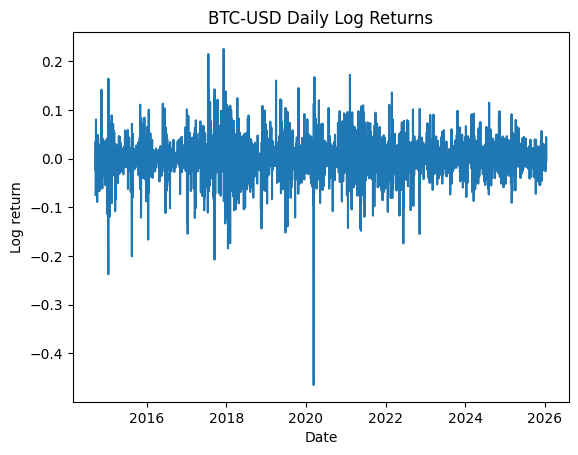

In [5]:
plt.figure()
plt.plot(df_eda.index, df_eda["log_return"])
plt.title("BTC-USD Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Log return")
plt.show()


## 4) Returns distribution (heavy tails)

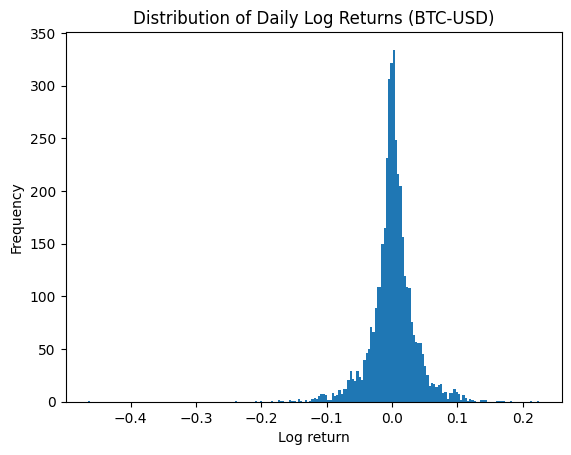

Mean: 0.0012932879802746177
Std : 0.035362831812042105
Min : -0.4647301753397741
Max : 0.2251189543413279


In [6]:
plt.figure()
plt.hist(df_eda["log_return"], bins=200)
plt.title("Distribution of Daily Log Returns (BTC-USD)")
plt.xlabel("Log return")
plt.ylabel("Frequency")
plt.show()

print("Mean:", float(df_eda["log_return"].mean()))
print("Std :", float(df_eda["log_return"].std()))
print("Min :", float(df_eda["log_return"].min()))
print("Max :", float(df_eda["log_return"].max()))


## 5) Volatility regimes (rolling volatility)

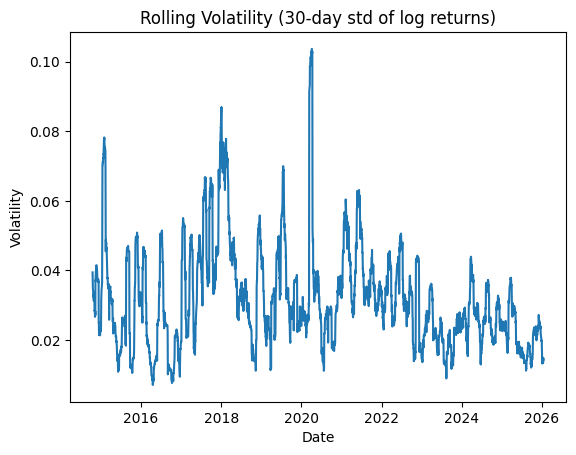

In [7]:
window = 30
df_eda["roll_vol_30d"] = df_eda["log_return"].rolling(window).std()

plt.figure()
plt.plot(df_eda.index, df_eda["roll_vol_30d"])
plt.title("Rolling Volatility (30-day std of log returns)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


## 6) Notes
- BTC exhibits strong bull/bear regimes.
- Volatility clusters and fat tails make generalization hard.
- This motivates multi-window evaluation and walk-forward testing for RL agents.
